In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Step 1: Data Preprocessing

In [2]:
# Load the dataset
data = pd.read_csv("C:\\Users\\ACER\\Documents\\Semester 2\\01_Machine Learning\\
                    01_Course Work\\02_Program\\Crash_Reporting_Drivers_Data.csv")


C:\Users\ACER\AppData\Local\Temp\ipykernel_7316\4122031992.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\ACER\\Documents\\Semester 2\\01_Machine Learning\\01_Course Work\\02_Program\\Crash_Reporting_Drivers_Data.csv")


In [3]:
data.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,PARKING LOT,...,15,No,No,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,NaN,...,35,No,No,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,MCP2651004P,210035267,Montgomery County Police,Property Damage Crash,09/08/2021 12:30:00 PM,NaN,NaN,NaN,NaN,PARKING LOT OF 10109 COLESVILLE RD,...,0,No,No,2010,TOYOTA,SUV,UNKNOWN,39.020303,-77.011436,"(39.02030267, -77.01143583)"
3,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
4,MCP2641001J,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"


In [33]:
# Check the duplicate rows
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
160893    False
160894    False
160895    False
160896    False
160897    False
Length: 160898, dtype: bool

In [34]:
# Check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160898 entries, 0 to 160897
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   160898 non-null  object 
 1   Local Case Number               160898 non-null  object 
 2   Agency Name                     160898 non-null  object 
 3   ACRS Report Type                160898 non-null  object 
 4   Crash Date/Time                 160898 non-null  object 
 5   Route Type                      145059 non-null  object 
 6   Road Name                       145967 non-null  object 
 7   Cross-Street Type               145031 non-null  object 
 8   Cross-Street Name               145958 non-null  object 
 9   Off-Road Description            14929 non-null   object 
 10  Municipality                    17841 non-null   object 
 11  Related Non-Motorist            5083 non-null    object 
 12  Collision Type  

In [35]:
# Categorical columns
cat_col = [col for col in data.columns if data[col].dtype == 'object']
print('\nCategorical columns :',cat_col)

# Numerical columns
num_col = [col for col in data.columns if data[col].dtype != 'object']
print('\nNumerical columns :',num_col)


Categorical columns : ['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name', 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault', 'Injury Severity', 'Circumstance', 'Driver Distracted By', 'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent', 'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Location']

Numerical columns : ['Speed Limit', 'Vehicle Year', 'Latitude', 'Longitude']


In [36]:
# Handle missing values if any

from sklearn.impute import SimpleImputer

# Fill missing values for numerical columns with mean
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Fill missing values for categorical columns with mode
categorical_columns = data.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer.fit_transform(data[categorical_columns])

# Verify if all missing values are filled
missing_values_count = data.isnull().sum().sum()
if missing_values_count == 0:
    print("All missing values have been filled successfully.")
else:
    print(f"There are still {missing_values_count} missing values in the dataset.")

# Save the filled DataFrame to a new file
data.to_csv('filled_data.csv', index=False)  # Replace file to new 'filled_data.csv'

All missing values have been filled successfully.


In [37]:
# Deleting missing values if any
data = data.dropna()
data.shape

(160898, 43)

In [38]:
# Drop irrelevant columns
columns_to_drop = ['Report Number', 'Local Case Number', 'Agency Name', 'Crash Date/Time',
                   'Route Type', 'Road Name', 'Cross-Street Type', 'Cross-Street Name',
                   'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Person ID',
                   'Drivers License State', 'Vehicle ID', 'Latitude', 'Longitude', 'Location']
data = data.drop(columns=columns_to_drop)


#### Step 2: Feature Selection and Extraction

In [39]:
# Encode categorical features
categorical_features = ['ACRS Report Type', 'Collision Type', 'Weather', 'Surface Condition',
                        'Light', 'Traffic Control', 'Driver Substance Abuse',
                        'Non-Motorist Substance Abuse', 'Driver At Fault', 'Injury Severity',
                        'Circumstance', 'Driver Distracted By', 'Vehicle Damage Extent',
                        'Vehicle First Impact Location', 'Vehicle Second Impact Location',
                        'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Continuing Dir',
                        'Vehicle Going Dir', 'Driverless Vehicle', 'Parked Vehicle',
                        'Vehicle Make', 'Vehicle Model', 'Equipment Problems']
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])

In [40]:
# Select top K best features

from sklearn.feature_selection import SelectKBest, chi2

# Specify the number of top K features to select
k = 10

# Define the input features (X) and the target variable (y)
X = data.drop(columns=['Injury Severity'])
y = data['Injury Severity']

# Apply feature selection
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['ACRS Report Type', 'Traffic Control', 'Driver At Fault',
       'Driver Distracted By', 'Vehicle Damage Extent', 'Vehicle Movement',
       'Speed Limit', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model'],
      dtype='object')


In [41]:
# Scale the features
from sklearn.preprocessing import StandardScaler

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)


In [42]:
# Split the dataset for training and testing
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Step 3: Classification Models

In [43]:
# Generalized Logistic Regression

from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
lr_model = LogisticRegression(max_iter=1000)

# Fit the model to the scaled training data
lr_model.fit(X_train, y_train)


# Make predictions on the scaled testing data
lr_predictions = lr_model.predict(X_test)


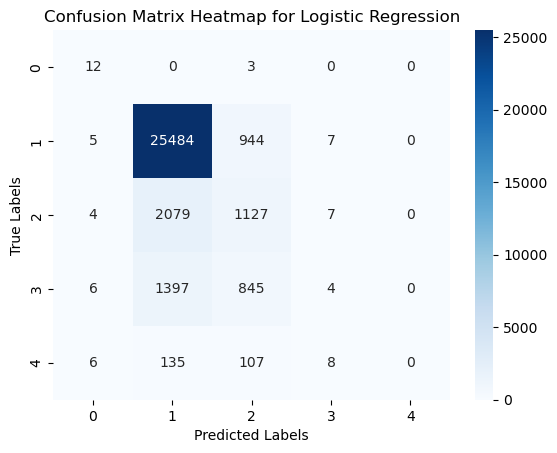

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y_test, lr_predictions)

# Create a heatmap for the confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap for Logistic Regression')

# Show the plot
plt.show()


In [45]:
# Optimized K-nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
import warnings

# Ignore the FutureWarning
warnings.filterwarnings('ignore', category=FutureWarning)  

# Create an instance of the KNeighborsClassifier model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the scaled training data
knn_model.fit(X_train, y_train)

# Make predictions on the scaled testing data
knn_predictions = knn_model.predict(X_test)


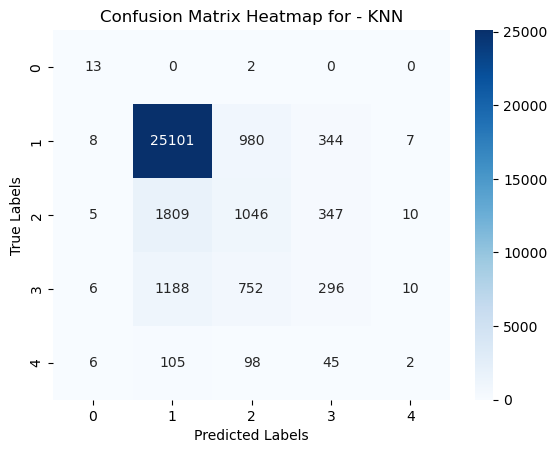

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, knn_predictions)



# Create a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap for - KNN")
plt.show()


In [47]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the testing data
dt_predictions = dt_model.predict(X_test)



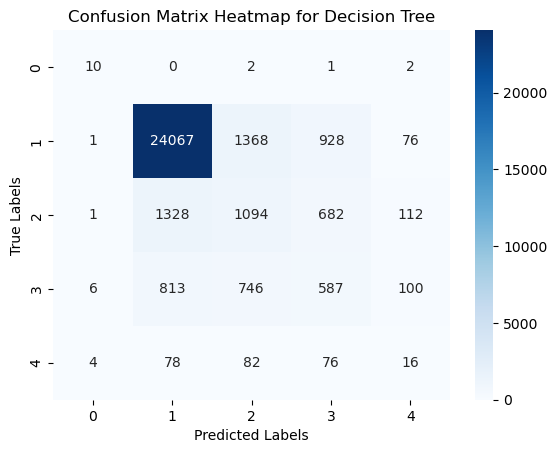

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
confusion = confusion_matrix(y_test, dt_predictions)

# Create a heatmap
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap for Decision Tree")

# Display the plot
plt.show()


#### Step 4: Performance Metrics

In [49]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Calculate accuracy for K-Nearest Neighbors
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Calculate accuracy for Decision Tree
dt_accuracy = accuracy_score(y_test, dt_predictions)


In [50]:
from sklearn.metrics import precision_score

# Calculate precision for Logistic Regression
lr_precision = precision_score(y_test, lr_predictions, average='weighted')

# Calculate precision for K-Nearest Neighbors
knn_precision = precision_score(y_test, knn_predictions, average='weighted')

# Calculate precision for Decision Tree
dt_precision = precision_score(y_test, dt_predictions, average='weighted')


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn.metrics import recall_score

# Calculate recall for Logistic Regression
lr_recall = recall_score(y_test, lr_predictions, average='weighted')

# Calculate recall for K-Nearest Neighbors
knn_recall = recall_score(y_test, knn_predictions, average='weighted')

# Calculate recall for Decision Tree
dt_recall = recall_score(y_test, dt_predictions, average='weighted')


In [52]:
from sklearn.metrics import f1_score

# Calculate F1 score for Logistic Regression
lr_f1_score = f1_score(y_test, lr_predictions, average='weighted')

# Calculate F1 score for K-Nearest Neighbors
knn_f1_score = f1_score(y_test, knn_predictions, average='weighted')

# Calculate F1 score for Decision Tree
dt_f1_score = f1_score(y_test, dt_predictions, average='weighted')


In [53]:
# Print the output results
import pandas as pd

# Create a list of model names
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree']

# Create lists of performance metric scores for each model
accuracy_scores = [lr_accuracy, knn_accuracy, dt_accuracy]
precision_scores = [lr_precision, knn_precision, dt_precision]
recall_scores = [lr_recall, knn_recall, dt_recall]
f1_scores = [lr_f1_score, knn_f1_score, dt_f1_score]

# Create a DataFrame to store the performance metrics
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Print the DataFrame
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.827439   0.767824  0.827439  0.790633
1  K-Nearest Neighbors  0.822188   0.788373  0.822188  0.802120
2        Decision Tree  0.800932   0.804183  0.800932  0.802533


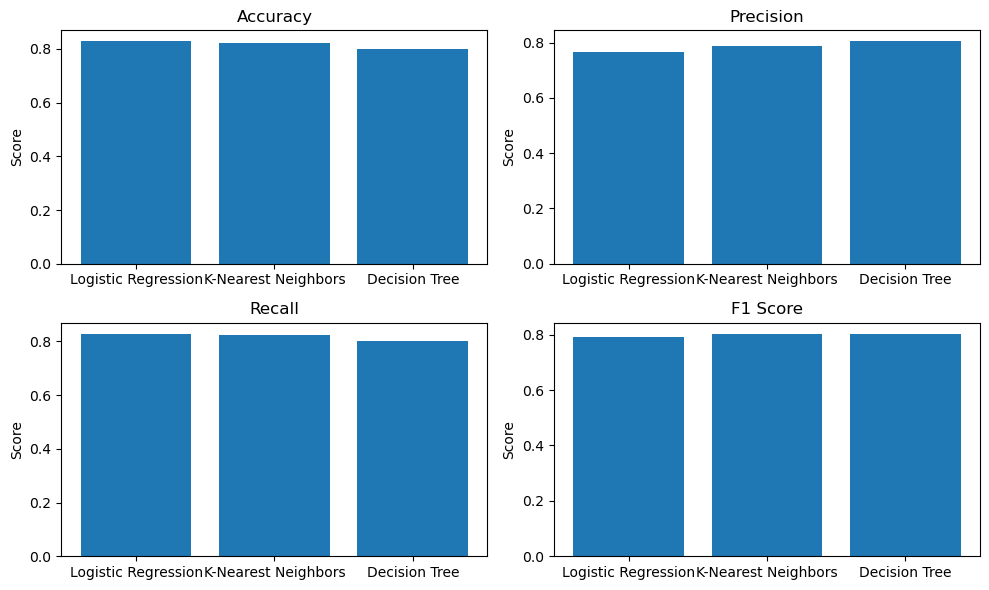

In [54]:
# Compare and plot the performance metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(models, accuracy_scores)
plt.title('Accuracy')
plt.ylabel('Score')

# Precision
plt.subplot(2, 2, 2)
plt.bar(models, precision_scores)
plt.title('Precision')
plt.ylabel('Score')

# Recall
plt.subplot(2, 2, 3)
plt.bar(models, recall_scores)
plt.title('Recall')
plt.ylabel('Score')

# F1 Score
plt.subplot(2, 2, 4)
plt.bar(models, f1_scores)
plt.title('F1 Score')
plt.ylabel('Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
